**Tasca M8 T01**

**Exercicis d'algoritmes d'Agrupació**

- Exercici 1 

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Important : Tingues en compte que prèviament et caldrà preparar el dataset.

- Exercici 2 

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

- Exercici 3 

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

**Clustering with K - Means Method**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
data = pd.read_csv('Publicacions Facebook Thailandia.csv',                     
                   sep=',')
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

**Cleaning the Dataset**

In [8]:
#The last four columns have Nan values, therefore, we will not use them for this analysis
data_fb = data.drop(['Column1', 'Column2', 'Column3',
       'Column4'], axis =1)

In [9]:
data_fb.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


In [10]:
# We need to split Column 'status_published' into Date and Time: 

data_fb[['Date_published','Time_published']] = data_fb ['status_published'].str.split(' ', n=1,expand = True)

In [11]:
data_fb

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_published,Time_published
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [12]:
data_fb['Date_published'].unique()

array(['4/22/2018', '4/21/2018', '4/18/2018', ..., '10/1/2016',
       '9/25/2016', '9/10/2016'], dtype=object)

In [13]:
data_fb_1 = data_fb.drop(['status_published'], axis = 1)

In [14]:
data_fb_1

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_published,Time_published
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


In [15]:
data_fb_1['Date_published'].unique()

array(['4/22/2018', '4/21/2018', '4/18/2018', ..., '10/1/2016',
       '9/25/2016', '9/10/2016'], dtype=object)

In [16]:
data_fb_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status_id       7050 non-null   object
 1   status_type     7050 non-null   object
 2   num_reactions   7050 non-null   int64 
 3   num_comments    7050 non-null   int64 
 4   num_shares      7050 non-null   int64 
 5   num_likes       7050 non-null   int64 
 6   num_loves       7050 non-null   int64 
 7   num_wows        7050 non-null   int64 
 8   num_hahas       7050 non-null   int64 
 9   num_sads        7050 non-null   int64 
 10  num_angrys      7050 non-null   int64 
 11  Date_published  7050 non-null   object
 12  Time_published  7050 non-null   object
dtypes: int64(9), object(4)
memory usage: 716.1+ KB


- Columns Dummy 

In [17]:
# We need to create a Dummy Column to change a categorical variable to numeric for the column Status_type

status_type_dummy = pd.get_dummies(data_fb_1['status_type'], prefix = 'Status')

In [18]:
data_fb_1 = pd.concat([data_fb_1, status_type_dummy], axis = 1 )

In [19]:
data_fb_1.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_published,Time_published,Status_link,Status_photo,Status_status,Status_video
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,0,0,0,1
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,0,1,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17,0,0,0,1
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29,0,1,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22,0,1,0,0


In [20]:
# Since we no longer need the Status_type column, we can drop this column from the dataset: 
data_fb_2 = data_fb_1.drop(['status_type'], axis = 1)

In [21]:
data_fb_2

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Date_published,Time_published,Status_link,Status_photo,Status_status,Status_video
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,0,0,0,1
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,0,1,0,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,4/21/2018,6:17,0,0,0,1
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,4/21/2018,2:29,0,1,0,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,4/18/2018,3:22,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,89,0,0,89,0,0,0,0,0,9/24/2016,2:58,0,1,0,0
7046,1050855161656896_1061334757275603,16,0,0,14,1,0,1,0,0,9/23/2016,11:19,0,1,0,0
7047,1050855161656896_1060126464063099,2,0,0,1,1,0,0,0,0,9/21/2016,23:03,0,1,0,0
7048,1050855161656896_1058663487542730,351,12,22,349,2,0,0,0,0,9/20/2016,0:43,0,1,0,0


In [22]:
data_fb_2.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'Date_published', 'Time_published', 'Status_link', 'Status_photo',
       'Status_status', 'Status_video'],
      dtype='object')

**The Features we want to Cluster**

In [23]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [24]:
#Taking off any missing values
data_fb_2 = data_fb_2.dropna(subset = features)

In [25]:
#Create the Dataset as a new dataframe for our clustering
data = data_fb_2[features].copy()

In [26]:
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


**K - Mean Clustering**

1. Scale the data 
2. Initialize random centroids 
3. Label each data point
4. Update our centroids 
5. Repeat steps 3 and 4 until centroids stop changing 

In [27]:
#We scale the data therefore no columns dominates over the rest as there is a big difference in values for some columns in the dataset

data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [28]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.439714,1.096198,1.105199,1.410910,1.174365,1.041742,1.039924,1.043004,1.032862
std,0.883997,0.381455,0.345911,0.858864,0.547574,0.282291,0.226845,0.281851,0.211010
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.032484,1.000000,1.000000,1.032484,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.113694,1.001715,1.000000,1.110828,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.418471,1.009862,1.010514,1.353025,1.041096,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [29]:
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.010828,1.219533,1.688668,1.825478,2.260274,1.097122,1.057325,1.176471,1.0
1,1.286624,1.000000,1.000000,1.286624,1.000000,1.000000,1.000000,1.000000,1.0
2,1.433758,1.101191,1.149825,1.389809,1.287671,1.032374,1.057325,1.000000,1.0
3,1.212102,1.000000,1.000000,1.212102,1.000000,1.000000,1.000000,1.000000,1.0
4,1.407006,1.000000,1.000000,1.389809,1.123288,1.000000,1.000000,1.000000,1.0


In [30]:
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.010828,1.219533,1.688668,1.825478,2.260274,1.097122,1.057325,1.176471,1.0
1,1.286624,1.000000,1.000000,1.286624,1.000000,1.000000,1.000000,1.000000,1.0
2,1.433758,1.101191,1.149825,1.389809,1.287671,1.032374,1.057325,1.000000,1.0
3,1.212102,1.000000,1.000000,1.212102,1.000000,1.000000,1.000000,1.000000,1.0
4,1.407006,1.000000,1.000000,1.389809,1.123288,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
7045,1.170064,1.000000,1.000000,1.170064,1.000000,1.000000,1.000000,1.000000,1.0
7046,1.030573,1.000000,1.000000,1.026752,1.013699,1.000000,1.057325,1.000000,1.0
7047,1.003822,1.000000,1.000000,1.001911,1.013699,1.000000,1.000000,1.000000,1.0
7048,1.670701,1.005145,1.057827,1.666879,1.027397,1.000000,1.000000,1.000000,1.0


In [31]:
# A Random single value for each column
centroid = data.apply(lambda x: float(x.sample()))

In [32]:

centroid

num_reactions    1.189172
num_comments     1.000000
num_shares       1.002629
num_likes        1.510191
num_loves        1.000000
num_wows         1.000000
num_hahas        1.000000
num_sads         1.000000
num_angrys       1.000000
dtype: float64

In [33]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    

In [34]:
centroids = random_centroids(data, 9)

In [35]:
centroids

,0,1,2,3,4,5,6,7,8
num_reactions,1.030573,1.433758,1.418471,1.313376,1.357325,1.248408,1.015287,1.173885,1.091720
num_comments,1.000429,1.000000,1.006860,1.039019,1.070319,1.000000,1.000429,1.005145,1.760219
num_shares,1.000000,1.665012,1.000000,1.002629,1.000000,1.002629,1.000000,1.000000,1.005257
num_likes,1.152866,1.640127,1.107006,1.005732,1.022930,1.414650,1.149045,1.171975,1.068790
num_loves,1.000000,1.000000,2.041096,1.000000,1.000000,1.000000,1.000000,1.013699,1.000000
num_wows,1.032374,1.032374,1.000000,1.032374,1.000000,1.000000,1.000000,1.000000,1.000000
num_hahas,1.000000,1.057325,1.000000,1.000000,1.000000,1.057325,1.000000,1.000000,1.000000
num_sads,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
num_angrys,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Label each data point: the distance between each data point according to the closest centroid of the belonging cluster
# Geometry
np.sqrt(((data - centroids.iloc[:,0]) **2).sum(axis = 1)) 

0       1.887455
1       0.290692
2       0.580811
3       0.193674
4       0.462701
          ...   
7045    0.144228
7046    0.142923
7047    0.157287
7048    0.824098
7049    0.124675
Length: 7050, dtype: float64

In [37]:
distances = centroids.apply(lambda x : np.sqrt(((data-x) **2).sum(axis = 1)))

In [38]:
# This represents the distance between each data point to the Cluster Centroid
distances 

,0,1,2,3,4,5,6,7,8
0,1.887455,1.428196,1.215928,1.813441,1.788807,1.702285,1.898180,1.801548,1.951635
1,0.290692,0.770187,1.064694,0.286694,0.281918,0.145410,0.304224,0.161458,0.814494
2,0.580811,0.648900,0.826765,0.523048,0.500931,0.388176,0.593949,0.475450,0.873127
3,0.193674,0.823961,1.066565,0.235419,0.248637,0.213628,0.206670,0.057314,0.782937
4,0.462701,0.724672,0.960483,0.417203,0.396501,0.210389,0.476038,0.337392,0.891975
...,...,...,...,...,...,...,...,...,...
7045,0.144228,0.858527,1.072199,0.223876,0.248314,0.263160,0.156198,0.015244,0.770944
7046,0.142923,0.991092,1.102626,0.294058,0.339411,0.445097,0.136613,0.211992,0.766121
7047,0.157287,1.019278,1.112911,0.314012,0.361301,0.483380,0.148215,0.240561,0.768341
7048,0.824098,0.656233,1.186595,0.755506,0.721954,0.499060,0.837757,0.703767,1.125424


In [39]:
# Each Row or data point belongs to its Cluster 
distances.idxmin(axis=1)

0       2
1       5
2       5
3       7
4       5
       ..
7045    7
7046    6
7047    6
7048    5
7049    6
Length: 7050, dtype: int64

In [40]:


def get_labels(data, centroids):    
    distances = centroids.apply(lambda x : np.sqrt(((data-x) **2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [41]:
labels = get_labels(data, centroids)

In [42]:
labels.value_counts()

6    2936
7    1132
5    1044
1     721
2     574
0     517
8     123
4       3
dtype: int64

In [43]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2,4,5,6,7,8
num_reactions,1.084825,2.982694,1.706415,1.284296,1.504265,1.028930,1.181637,1.531639
num_comments,1.003463,1.106081,1.431744,1.394244,1.029334,1.001011,1.021478,2.659557
num_shares,1.006564,1.178157,1.635253,1.183817,1.021873,1.001082,1.028591,1.609289
num_likes,1.082435,2.928941,1.508314,1.224517,1.488065,1.028668,1.172553,1.435570
num_loves,1.007459,1.160848,2.308097,1.396949,1.074389,1.001518,1.046657,1.542341
num_wows,1.013559,1.081731,1.133385,1.032036,1.040006,1.000119,1.017926,1.084940
num_hahas,1.005341,1.043008,1.202751,1.036843,1.026113,1.000338,1.013919,1.274113
num_sads,1.011367,1.034330,1.106899,1.055667,1.040881,1.002267,1.028127,1.353866
num_angrys,1.014262,1.030655,1.165595,1.088678,1.018801,1.000349,1.012900,1.118065


- Steps: 
We have splitted our Dataframe by Clusters (labels series has given us the Clusters assign to each datapoint ) and then to each group or "label" we apply a function which calculates the geometric Mean for each feature or column and the geometric Mean for each feature is the cluster centroid 

In [44]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [45]:
from sklearn.decomposition import PCA #Principal Components Analysis
import matplotlib.pyplot as plt 
from IPython.display import clear_output

- We will create a function to plot our Clusters

In [46]:
def plot_clusters(data, labels, centroids, iteration): 
    pca = PCA(n_components=2) # We want to have 2 columns return by our PCA (the data has more columns)
    data_2d = pca.fit_transform(data) # Transforms the data into a 2-dimensional data
    centroids_2d = pca.transform(centroids.T) # Same with Centroids. T = because this PCA expects our Data to be: the columns must be the features and the Rows must be the data points
    clear_output(wait=True) #to clear th egraph over th enew one 
    plt.title (f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y= data_2d[:,1], c=labels)
    plt.show()

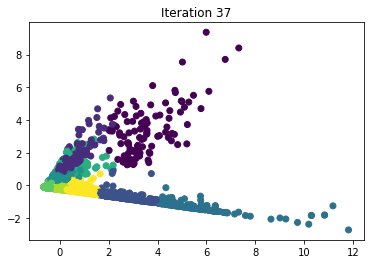

In [47]:
iterations = 100
k = 9

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < iterations and not centroids.equals(old_centroids):
    old_centroids = centroids 
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    

In [48]:
centroids

,0,1,2,3,4,5,6,7,8
num_reactions,3.594199,1.740089,3.288366,5.354323,1.358562,1.575607,1.058724,1.386882,1.947119
num_comments,1.897941,3.297045,1.025547,1.026530,1.262044,1.494081,1.003166,1.017453,1.019973
num_shares,2.702516,1.920125,1.034952,1.031757,1.349680,1.712896,1.003926,1.014743,1.018366
num_likes,3.026356,1.582347,3.272540,5.344059,1.274904,1.380897,1.057487,1.375616,1.930656
num_loves,4.200912,1.881258,1.051673,1.038099,1.514504,2.294356,1.005643,1.055107,1.074190
num_wows,1.813625,1.106260,1.079730,1.056880,1.039122,1.048592,1.004344,1.033328,1.061628
num_hahas,1.582696,1.383629,1.015334,1.009737,1.106310,1.157315,1.002970,1.017420,1.016919
num_sads,1.296911,1.453757,1.009931,1.003357,1.109839,1.091080,1.006255,1.026791,1.026640
num_angrys,1.537995,1.158659,1.006617,1.000000,1.111266,1.126991,1.003266,1.002568,1.005122


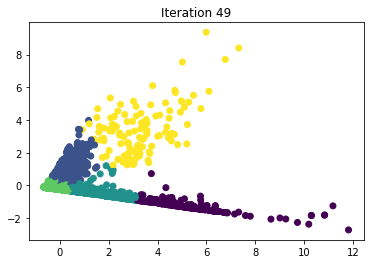

In [49]:
iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < iterations and not centroids.equals(old_centroids):
    old_centroids = centroids 
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

- Using K-Mean with Sciklearn

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(9)
kmeans.fit(data)

KMeans(n_clusters=9)

In [64]:
centroids = kmeans.cluster_centers_

In [65]:
pd.DataFrame(centroids, columns = features).T

,0,1,2,3,4,5,6,7,8
num_reactions,1.469263,1.089044,5.427704,3.461993,3.242133,4.266788,1.785987,1.674497,1.561040
num_comments,1.426059,1.009905,1.027868,2.079262,1.028201,1.722364,3.523754,1.030828,1.151882
num_shares,1.586705,1.012389,1.034442,2.704466,1.045935,3.266272,2.024754,1.023898,1.026577
num_likes,1.328672,1.085688,5.416465,2.980747,3.226138,3.292084,1.611179,1.656331,1.486837
num_loves,1.942733,1.017723,1.046039,4.043120,1.068880,5.784736,2.051173,1.094585,1.163623
num_wows,1.043952,1.007905,1.074594,1.494809,1.095034,5.321172,1.110891,1.051319,1.070144
num_hahas,1.137428,1.007151,1.011229,1.582368,1.017567,2.370337,1.446738,1.041901,1.035032
num_sads,1.094663,1.012106,1.003639,1.385027,1.012808,1.252101,1.505071,1.029280,5.088235
num_angrys,1.134106,1.007113,1.000000,1.590543,1.008195,1.580645,1.193548,1.031245,1.274194


- Silhouette Score for K-mean

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [71]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [72]:
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.010828,1.219533,1.688668,1.825478,2.260274,1.097122,1.057325,1.176471,1.0
1,1.286624,1.000000,1.000000,1.286624,1.000000,1.000000,1.000000,1.000000,1.0
2,1.433758,1.101191,1.149825,1.389809,1.287671,1.032374,1.057325,1.000000,1.0
3,1.212102,1.000000,1.000000,1.212102,1.000000,1.000000,1.000000,1.000000,1.0
4,1.407006,1.000000,1.000000,1.389809,1.123288,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
7045,1.170064,1.000000,1.000000,1.170064,1.000000,1.000000,1.000000,1.000000,1.0
7046,1.030573,1.000000,1.000000,1.026752,1.013699,1.000000,1.057325,1.000000,1.0
7047,1.003822,1.000000,1.000000,1.001911,1.013699,1.000000,1.000000,1.000000,1.0
7048,1.670701,1.005145,1.057827,1.666879,1.027397,1.000000,1.000000,1.000000,1.0


In [73]:
# Extract features
X = data.iloc[:,:].values
X

array([[2.01082803, 1.21953311, 1.68866822, ..., 1.05732484, 1.17647059,
        1.        ],
       [1.2866242 , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.43375796, 1.10119104, 1.14982477, ..., 1.05732484, 1.        ,
        1.        ],
       ...,
       [1.00382166, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.67070064, 1.00514531, 1.0578271 , ..., 1.        , 1.        ,
        1.        ],
       [1.03248408, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [74]:
silhouette_score(X, kmeans.labels_)

0.6374906573354032

In [77]:
#Create a list of hypothetical scenarios for different number of clusters

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]
silhouette_scores

[0.8125263296259141,
 0.8186202280537245,
 0.6441638843221605,
 0.6960483422278946,
 0.6193421432911158,
 0.6315271731847734,
 0.6328060677010973,
 0.6376869710637167]

In [89]:
# Plot the silhouette scores graph
rcParams['figure.figsize'] = 16, 5
plt.plot(range(2, 10)), silhouette_scores, 'bo-', color='blue',
            linewidth=3, markersize=8, label='silhouette curve')
plt.xlabel('$k$'), fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')

plt.title('Silhouette curve for predict optimal number of clusters', family='Arial', fontsize=14)

# Calculate the optimal number of cluster

k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark optimal number of clusters 

plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
               label='Optimal number of clusters({})'.format(k))

plt.scatter(k, silhouette_scores[k=2], c='red', s=400)

plt.legend(shadow=True)

plt.show()

SyntaxError: cannot assign to function call (3410529170.py, line 3)

**Hierarchical Clustering**

In [54]:
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.010828,1.219533,1.688668,1.825478,2.260274,1.097122,1.057325,1.176471,1.0
1,1.286624,1.000000,1.000000,1.286624,1.000000,1.000000,1.000000,1.000000,1.0
2,1.433758,1.101191,1.149825,1.389809,1.287671,1.032374,1.057325,1.000000,1.0
3,1.212102,1.000000,1.000000,1.212102,1.000000,1.000000,1.000000,1.000000,1.0
4,1.407006,1.000000,1.000000,1.389809,1.123288,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
7045,1.170064,1.000000,1.000000,1.170064,1.000000,1.000000,1.000000,1.000000,1.0
7046,1.030573,1.000000,1.000000,1.026752,1.013699,1.000000,1.057325,1.000000,1.0
7047,1.003822,1.000000,1.000000,1.001911,1.013699,1.000000,1.000000,1.000000,1.0
7048,1.670701,1.005145,1.057827,1.666879,1.027397,1.000000,1.000000,1.000000,1.0


Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

In [55]:
#let’s first normalize the data and bring all the variables to the same scale:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.433372,0.262833,0.363941,0.393426,0.487133,0.236451,0.227874,0.253552,0.215519
1,0.400687,0.311425,0.311425,0.400687,0.311425,0.311425,0.311425,0.311425,0.311425
2,0.407756,0.313175,0.327006,0.395257,0.366209,0.293604,0.300700,0.284397,0.284397
3,0.384487,0.317207,0.317207,0.384487,0.317207,0.317207,0.317207,0.317207,0.317207
4,0.420931,0.299168,0.299168,0.415786,0.336052,0.299168,0.299168,0.299168,0.299168


In [57]:
data_scaled.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.383211,0.314161,0.316222,0.377570,0.329945,0.302708,0.302974,0.303865,0.301530
std,0.078654,0.059893,0.054138,0.080089,0.070411,0.052091,0.052761,0.060809,0.055576
min,0.134178,0.070987,0.069679,0.127091,0.069497,0.069497,0.069497,0.059557,0.069497
25%,0.339688,0.308241,0.309945,0.337766,0.319393,0.291148,0.291702,0.289040,0.287985
50%,0.350244,0.327770,0.328959,0.347419,0.330055,0.326292,0.324966,0.325184,0.324709
75%,0.392897,0.331771,0.332182,0.385224,0.332908,0.331328,0.331011,0.331058,0.330919
max,0.694966,0.911582,0.653506,0.694966,0.711208,0.805357,0.868157,0.950560,0.951059


Here, we can see that the scale of all the variables is almost similar. 
Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

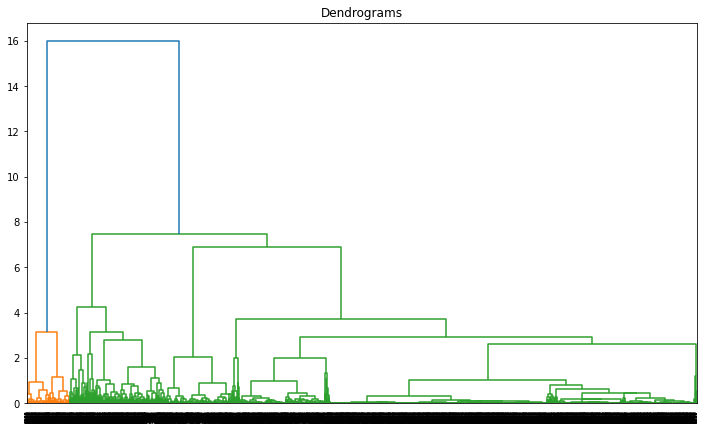

In [59]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 8 and cut the dendrogram:

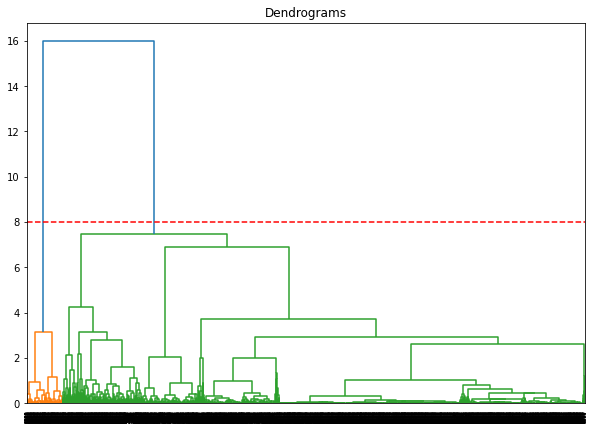

In [61]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')